In [109]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [110]:
config = {
    "mathtext.fontset": 'stix',
    "font.family": 'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号
    'axes.unicode_minus': False # 处理负号
}
rcParams.update(config)  ## 设置画图的一些参数

In [111]:
path = 'D:\\机器学习\\代码\\Assignment\\assigment4\\ex2data1.txt'
data = pd.read_csv(path)
data.insert(0, 'ones', 1)
cols = data.shape[1]
X_data = data.iloc[:, :cols-1]#X是所有行，去掉最后一列， 未标准化
y_data = data.iloc[:, cols-1:]#X是所有行，最后一列
X = X_data.values
Y = y_data.values

In [112]:
#将数据集划分为训练数据集和测试数据集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)
for i in range(1, cols-1):
    max = x_train[:, i:i+1].max()
    min = x_train[:, i:i+1].min()
    x_train[:, i:i+1] = (x_train[:, i:i+1] - min) / (max - min)
    x_test[:, i:i+1] = (x_test[:, i:i+1] - min) / (max - min)

In [113]:
def sigmoid(X, W):
    return 1 / (1 + np.exp(-(X@W)))

def Loss(X, Y, W):
    Y_ = sigmoid(X, W)
    loss = -1 * np.sum(Y * np.log(Y_) + (1 - Y) * np.log(1 - Y_)) / X.shape[0]
    return loss

In [114]:
lambda_ = 0.005
def gradientDescent(X, Y, W, alpha):
    y = sigmoid(X, W)
    dw = (X.T  @ (y - Y)) / X.shape[0] + lambda_*W
    dw[0:1, :] = (X.T  @ (y - Y))[0:1, :] / X.shape[0]
    W -= alpha * dw
    return W

In [115]:
def  LogicRegression(X, Y, alpha, iters):
    Ws = []
    feature_dim = X.shape[1]
    W = np.zeros((feature_dim, 1))
    for i in range(iters):
        W = gradientDescent(X, Y, W, alpha)
        tw = W.copy()
        Ws.append(tw)
    return Ws ## 模型参数。

In [116]:
def predict(X, W):
    p = sigmoid(X, W)
    y_ = np.array(p >= 0.5, dtype=int)
    return y_, p

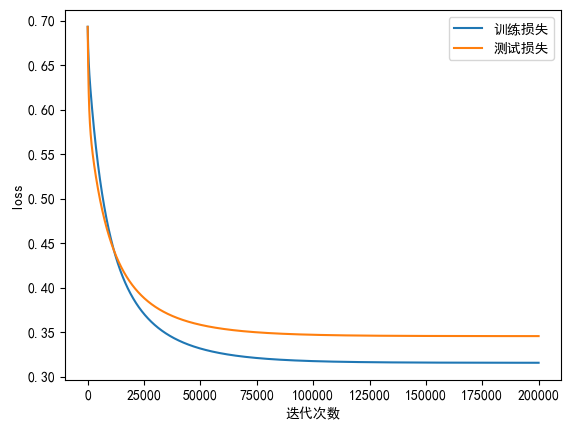

In [129]:
alpha = 0.005
iters = 200000
Ws = LogicRegression(x_train, y_train, alpha, iters)
loss_train = []
loss_test = []
for w in Ws:
    loss_train.append(Loss(x_train,y_train, w))
    loss_test.append(Loss(x_test,y_test, w))
iter = np.arange(iters)
plt.plot(iter, loss_train, label='训练损失')
plt.plot(iter, loss_test, label='测试损失')
plt.legend()
plt.xlabel('迭代次数')
plt.ylabel('loss')
plt.show()

In [130]:
y_train_hat, y_train_p = predict(x_train, Ws[-1])
y_test_hat, y_test_p = predict(x_test, Ws[-1])

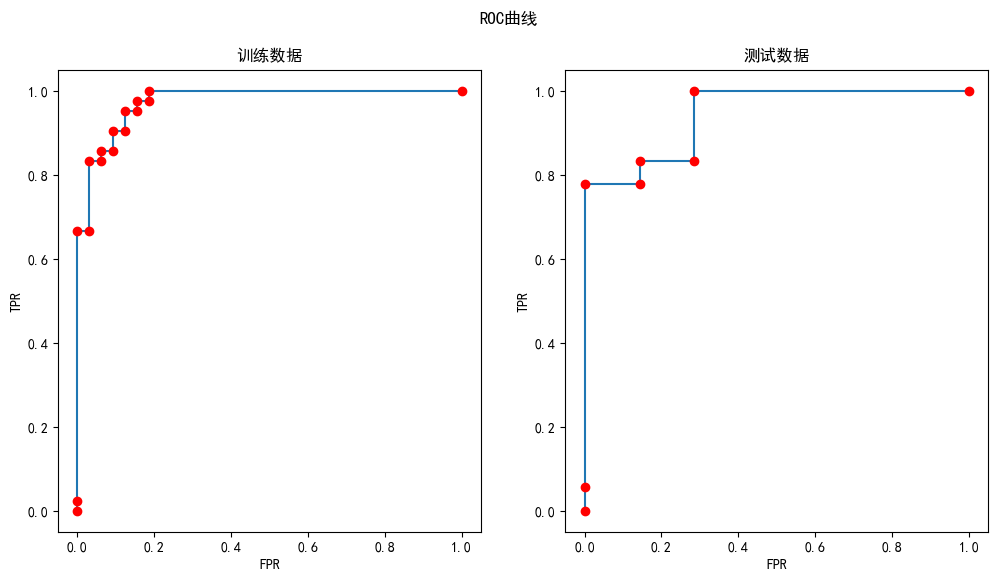

In [131]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_p)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.suptitle('ROC曲线')
plt.plot(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, 'ro')
plt.title('训练数据')
plt.xlabel('FPR')
plt.ylabel('TPR')
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_p)
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, 'ro')
plt.title('测试数据')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [132]:
acc_train = accuracy_score(y_train,  y_train_hat)
pre_train = precision_score(y_train, y_train_hat)
acc_test = accuracy_score(y_test,  y_test_hat)
pre_test = precision_score(y_test, y_test_hat)
F1_train = 2 * acc_train * pre_train / (acc_train + pre_train)
F1_test = 2 * acc_test * pre_test / (acc_test + pre_test)
auc_train = roc_auc_score(y_train, y_train_p)
auc_test = roc_auc_score(y_test, y_test_p)

In [133]:
eval = pd.DataFrame([['precision', pre_train, pre_test], ['recall', acc_train, acc_test],
                      ['F1_score', F1_train, F1_test], ['AUC',  auc_train, auc_test]], columns=[' ', '训练集', '测试集'])
eval

,,训练集,测试集
0,precision,0.926829,0.894737
1,recall,0.905405,0.880000
2,F1_score,0.915992,0.887307
3,AUC,0.974702,0.944444
